# Cal Sports Project - GO BEARS


### By Alex Lee

In [13]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import helper_functions

## EDA

All data has been collected from the Cal football website (https://calbears.com/sports/football/stats) and has been formatted into a compatible format (csv). The first dataset, team, contains season totals offensively and defensivly for each year under Justin Wilcox. The wilcox_record dataset contains total wins and losses data and corresponding conference records each year under Wilcox. Individual game stats have also been collected in for the 2023 season up through the USC game (Week 9).

In [58]:
team_temp = pd.read_csv("datasets/team_stats_wilcox.csv")
team_temp.head(10)

,Years,Cal 2023,Oponent 2023,Cal 2022,Opponent 2022,Cal 2021,Opponent 2021,Cal 2020,Opponent 2020,Cal 2019,Opponent 2019,Cal 2018,Opponent 2018,Cal 2017,Opponent 2017
0,Points Per Game,32.25,33.5,23.92,27.83,23.75,22.25,20.25,26.5,21.23,21.92,21.54,20.38,27.75,28.42
1,Total,258,268,287,334,285,267,81,106,276,285,280,265,333,341
2,Rushing First Downs,79,59,68,107,101,108,23,34,104,99,111,106,96,116
3,Passing First Downs,86,83,139,162,111,124,37,35,105,158,113,103,139,136
4,Penalty First Downs,21,6,24,12,16,23,13,5,35,15,27,18,30,17
5,Total First Downs,186,148,231,281,228,255,73,74,244,272,251,227,265,269
6,Rushing Yards Gained,1773,1310,1501,2005,2211,1940,623,739,2131,1980,2314,2206,1912,2301
7,Rushing Yards Lost,171,161,342,210,241,299,122,62,421,338,269,359,405,332
8,Rushing Attempts,321,286,319,426,402,418,148,153,476,461,487,511,416,475
9,Rushing Average Per Attempt,5,4,3.6,4.2,4.9,3.9,3.4,4.4,3.6,3.6,4.2,3.6,3.6,4.1


In [59]:
team_temp.set_index("Years", inplace=True)
team = team_temp.T
team.head(5)

Years,Points Per Game,Total,Rushing First Downs,Passing First Downs,Penalty First Downs,Total First Downs,Rushing Yards Gained,Rushing Yards Lost,Rushing Attempts,Rushing Average Per Attempt,...,Avg. TOP Per Game,Total TOP,3rd Down Conversions,4th Down Conversions,Fumbles-Lost,Sacks-Yards Lost,PAT: Good-Attempts,Misc. Yards,Red Zone: Attempts-Scores,Red Zone: Touchdowns
Cal 2023,32.25,258,79,86,21,186,1773,171,321,5,...,29:08:00,3:53:06,50-121 (41.32 %),12-23 (52.17 %),13-7,11-86,25-28,0,27-34,23-34
Oponent 2023,33.5,268,59,83,6,148,1310,161,286,4,...,30:52:00,4:06:54,44-113 (38.94 %),13-23 (56.52 %),14-8,12-104,32-33,0,34-36,27-36
Cal 2022,23.92,287,68,139,24,231,1501,342,319,3.6,...,28:42:00,5:44:30,59-167 (35.33 %),12-22 (54.55 %),11-3,19-110,31-32,0,33-40,24-40
Opponent 2022,27.83,334,107,162,12,281,2005,210,426,4.2,...,31:18:00,6:15:30,66-169 (39.05 %),15-25 (60.00 %),14-7,31-251,39-40,0,39-48,33-48
Cal 2021,23.75,285,101,111,16,228,2211,241,402,4.9,...,30:21:00,6:04:10,67-165 (40.61 %),9-29 (31.03 %),7-2,23-160,31-31,0,32-41,24-41


In [60]:
# Splitting Dfs into offensive and defensive data
offense = team.iloc[::2]
defense = team.iloc[1::2]

In [61]:
wilcox_record = pd.read_csv("datasets/winning_percentage.csv")
wilcox_record

,Year,Wins,Loss,Pct,Conf Wins,Conf Losses,Conf. Pct
0,2023,3,5,0.375000,1,4,0.200000
1,2022,4,8,0.333333,2,7,0.222222
2,2021,5,7,0.416667,4,5,0.444444
3,2020,1,3,0.250000,1,3,0.250000
4,2019,8,5,0.615385,4,5,0.444444
5,2018,7,6,0.538462,4,5,0.444444
6,2017,5,7,0.416667,2,7,0.222222


In [62]:
# Adding win percentage data to offense and defense
offense['Win Pct'] = wilcox_record['Pct'].to_numpy()
defense['Win Pct'] = wilcox_record['Pct'].to_numpy()
offense['Conf. Win Pct'] = wilcox_record['Conf. Pct'].to_numpy()
defense['Conf. Win Pct'] = wilcox_record['Conf. Pct'].to_numpy()
offense.head()

/var/folders/7w/w2959j9d6jd_0gxlxyvjrkdr0000gn/T/ipykernel_43850/3790961202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offense['Win Pct'] = wilcox_record['Pct'].to_numpy()
/var/folders/7w/w2959j9d6jd_0gxlxyvjrkdr0000gn/T/ipykernel_43850/3790961202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defense['Win Pct'] = wilcox_record['Pct'].to_numpy()
/var/folders/7w/w2959j9d6jd_0gxlxyvjrkdr0000gn/T/ipykernel_43850/3790961202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Years,Points Per Game,Total,Rushing First Downs,Passing First Downs,Penalty First Downs,Total First Downs,Rushing Yards Gained,Rushing Yards Lost,Rushing Attempts,Rushing Average Per Attempt,...,3rd Down Conversions,4th Down Conversions,Fumbles-Lost,Sacks-Yards Lost,PAT: Good-Attempts,Misc. Yards,Red Zone: Attempts-Scores,Red Zone: Touchdowns,Win Pct,Conf. Win Pct
Cal 2023,32.25,258,79,86,21,186,1773,171,321,5,...,50-121 (41.32 %),12-23 (52.17 %),13-7,11-86,25-28,0,27-34,23-34,0.375000,0.200000
Cal 2022,23.92,287,68,139,24,231,1501,342,319,3.6,...,59-167 (35.33 %),12-22 (54.55 %),11-3,19-110,31-32,0,33-40,24-40,0.333333,0.222222
Cal 2021,23.75,285,101,111,16,228,2211,241,402,4.9,...,67-165 (40.61 %),9-29 (31.03 %),7-2,23-160,31-31,0,32-41,24-41,0.416667,0.444444
Cal 2020,20.25,81,23,37,13,73,623,122,148,3.4,...,25-67 (37.31 %),4-8 (50.00 %),4-2,7-31,9-10,0,11-14,8-14,0.250000,0.250000
Cal 2019,21.23,276,104,105,35,244,2131,421,476,3.6,...,65-173 (37.57 %),6-16 (37.50 %),11-4,36-228,33-34,0,30-35,25-35,0.615385,0.444444


In [39]:
game_stats_2023_partial = pd.read_csv("datasets/game_stats_partial.csv")
game_stats_2023_partial

,Date,Opponent,Home,Away,Win,Loss,Point Diff,Rushing ATT,Rushing YDS,Rushing TD,...,Opp. Red Zone Scores,Opp. Red Zone Points,Opp. Red Zone TDs,Opp. Red Zone Rush TD,Opp. Red Zone Pass TD,Opp. Red Zone FGM,Opp. Red Zone FGA,Opp. Red Zone TO on Downs,Opp. Red Zone INT,Opp. Red Zone FUM
0,09/02/2023,North Texas,0,1,1,0,37,56,357,6,...,2,14,2,0,2,0,0,0,0,0
1,09/09/2023,Auburn,1,0,0,1,-4,40,113,1,...,2,14,2,0,2,0,0,0,0,0
2,09/16/2023,Idaho,1,0,1,0,14,43,256,2,...,3,17,2,2,0,1,0,0,0,0
3,09/23/2023,Washington,0,1,0,1,-27,35,139,2,...,4,28,4,2,2,0,0,0,0,0
4,09/30/2023,Arizona St.,1,0,1,0,3,48,196,2,...,4,21,2,2,0,2,0,0,0,0
5,10/07/2023,Oregon St.,1,0,0,1,-12,33,240,3,...,7,45,6,1,5,1,0,0,0,0
6,10/14/2023,Utah,0,1,0,1,-20,24,66,0,...,5,27,3,3,0,2,1,0,0,0
7,10/28/2023,Southern California,1,0,0,1,-1,42,235,5,...,7,44,6,5,1,1,1,0,0,0


### Visualizations

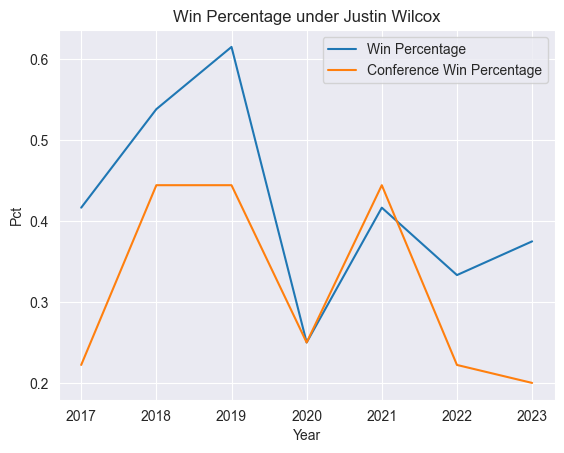

In [14]:
# Line plot of win percentages during wilcox's time
x = ['Year', 'Year']
y = ['Pct', 'Conf. Pct']
dfs = [wilcox_record, wilcox_record]
labels = ['Win Percentage', 'Conference Win Percentage']
helper_functions.plot_line_graph(x, y, dfs, labels, 'Win Percentage under Justin Wilcox')